In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns

In [17]:
tf1 = tf.constant([[15, 21], [30, 40]])
print(tf1)
#(crud)
print(np.square(tf1))
# convert to numPy object
tf1 = tf1 + 110
print(tf1)
# update
tf1_without_2nd_row = tf.gather(tf1, [0])
print(tf1_without_2nd_row)

tf.Tensor(
[[15 21]
 [30 40]], shape=(2, 2), dtype=int32)
[[ 225  441]
 [ 900 1600]]
tf.Tensor(
[[115 121]
 [130 140]], shape=(2, 2), dtype=int32)
tf.Tensor([[115 121]], shape=(1, 2), dtype=int32)


In [18]:
scalar = tf.constant(10)
scalar
scalar.ndim
vector = tf.constant([19, 11.2])
vector
vector.ndim

mat1 = tf.constant([[10, 20],
             [30, 40]])
mat1
mat1.ndim
mat2 = tf.constant([[10., 40.],
                    [30., 20.],
                    [50., 60.]], dtype=tf.float16)

mat2
mat2.ndim


tensor = tf.constant([[[10, 20, 30,],
                       [40, 50, 60]],
                      [[70, 80, 90],
                       [100, 110, 120]],
                      [[130, 140, 150],
                       [160, 170, 180]]])
tensor

tensor.ndim
random_1 = tf.random.Generator.from_seed(70)
random_1 = random_1.normal(shape=(40, 20))
random_2 = tf.random.Generator.from_seed(10)
random_2 = random_2.normal(shape=(50, 30))
df2 = pd.DataFrame(np.random.randint(0, 10, (5, 5)), columns=["1", "2", "3", "4", "5"])
print(df2)
print(df2.describe(include='all'))
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'feature1': np.random.rand(10),
        'feature2': np.random.rand(10),
        'feature3': np.random.rand(10),
        'target': np.random.randint(0, 3, 10)
    }
)
features = ['feature1', 'feature2', 'feature3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

   1  2  3  4  5
0  5  3  5  4  2
1  2  6  0  5  2
2  2  6  1  4  7
3  1  2  4  1  9
4  8  6  2  2  8
              1         2         3         4         5
count  5.000000  5.000000  5.000000  5.000000  5.000000
mean   3.600000  4.600000  2.400000  3.200000  5.600000
std    2.880972  1.949359  2.073644  1.643168  3.361547
min    1.000000  2.000000  0.000000  1.000000  2.000000
25%    2.000000  3.000000  1.000000  2.000000  2.000000
50%    2.000000  6.000000  2.000000  4.000000  7.000000
75%    5.000000  6.000000  4.000000  4.000000  8.000000
max    8.000000  6.000000  5.000000  5.000000  9.000000
   feature1  feature2  feature3  target
0  0.349051  0.169122  0.778234       1
1  0.841304  0.185605  0.435028       1
2  0.920856  0.516001  0.028445       2
3  0.885481  0.801494  0.887146       0
4  0.629157  0.155631  0.876612       2
5  0.792219  0.616243  0.231173       2
6  0.062229  0.240801  0.932983       0
7  0.357152  0.832714  0.307042       2
8  0.094562  0.691244  0.796349   

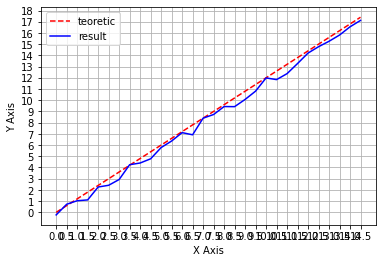

In [19]:
x = np.arange(0, 15, 0.5)
y1 = x * 1.2

adder = np.random.random(len(x)) * 1.1 - 0.9
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

plt.plot(x, y1, "r--", label="teoretic")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [5]:

mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.391058279982458
0.18170467632153425


In [6]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('output.csv', 'w') as f:
    f.write(df.to_csv(index=False))

       X          Y  Y_hat
0    0.0   0.259586   0.00
1    0.5   1.064333   0.75
2    1.0   0.900577   1.50
3    1.5   1.764215   2.25
4    2.0   3.446922   3.00
5    2.5   3.657645   3.75
6    3.0   4.971413   4.50
7    3.5   5.500048   5.25
8    4.0   6.465933   6.00
9    4.5   6.565778   6.75
10   5.0   7.032065   7.50
11   5.5   7.882993   8.25
12   6.0   9.537090   9.00
13   6.5   9.484031   9.75
14   7.0  10.851752  10.50
15   7.5  11.564003  11.25
16   8.0  12.566138  12.00
17   8.5  13.021263  12.75
18   9.0  13.865895  13.50
19   9.5  14.285969  14.25
20  10.0  14.514092  15.00
21  10.5  16.042261  15.75
22  11.0  17.080339  16.50
23  11.5  17.069865  17.25
24  12.0  17.466305  18.00
25  12.5  18.630812  18.75
26  13.0  18.887499  19.50
27  13.5  19.749927  20.25
28  14.0  20.374431  21.00
29  14.5  21.060960  21.75


In [7]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 473ms/step - loss: 6.7421 - mae: 6.7421
Epoch 2/80
1/1 [==============================] - 0s 3ms/step - loss: 6.2074 - mae: 6.2074
Epoch 3/80
1/1 [==============================] - 0s 4ms/step - loss: 5.6731 - mae: 5.6731
Epoch 4/80
1/1 [==============================] - 0s 4ms/step - loss: 5.1387 - mae: 5.1387
Epoch 5/80
1/1 [==============================] - 0s 4ms/step - loss: 4.6044 - mae: 4.6044
Epoch 6/80
1/1 [==============================] - 0s 5ms/step - loss: 4.0701 - mae: 4.0701
Epoch 7/80
1/1 [==============================] - 0s 5ms/step - loss: 3.5357 - mae: 3.5357
Epoch 8/80
1/1 [==============================] - 0s 4ms/step - loss: 3.0014 - mae: 3.0014
Epoch 9/80
1/1 [==============================] - 0s 5ms/step - loss: 2.4671 - mae: 2.4671
Epoch 10/80
1/1 [==============================] - 0s 5ms/step - loss: 1.9327 - mae: 1.9327
Epoch 11/80
1/1 [==============================] - 0s 8ms/step - loss: 1.3984 - mae: 1.

In [8]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(30, 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


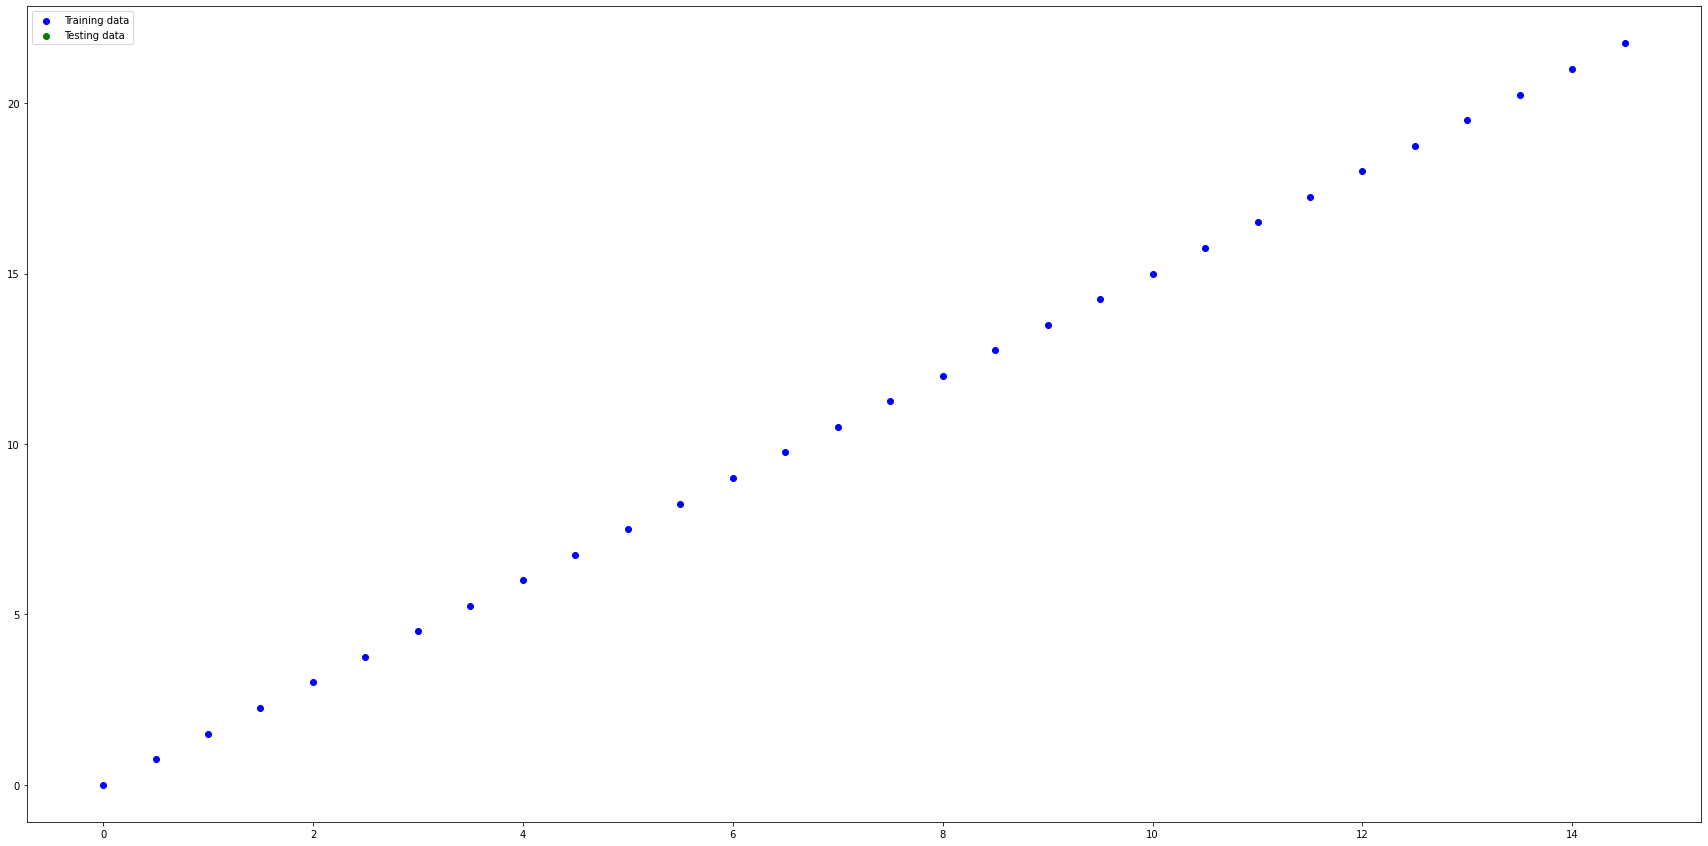

In [11]:
plt.figure(figsize=(30, 15))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()
model.summary()
model.fit(X_train, y_train, epochs=80, verbose=0)
model.predict([20.0])
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=20, verbose=0)

In [13]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [14]:

tf.random.set_seed(42)

X_regression = np.arange(0, 100, 5)
y_regression = np.arange(100, 110, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]
model_1.evaluate(x, y1)
len(x)

X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

1/1 [==============================] - 0s 113ms/step - loss: -150.9824 - accuracy: 0.0333
Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1/1 [==============================] - 0s 375ms/step - loss: 24.0441 - accuracy: 0.0333
Epoch 2/25
1/1 [==============================] - 0s 6ms/step - loss: 22.0634 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 10ms/step - loss: 20.1491 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 7ms/step - loss: 18.3022 - accuracy: 0.0000e+00
Epoch 5/25
1/1 [==============================] - 0s 4ms/step - loss: 16.5236 - accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 0s 11ms/step - loss: 14.8142 - accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 13.1743 - accuracy: 0.0000e+00
Epoch 8/25
1/1 [==============================] - 0s 4ms/step - loss: 11.6044 - accuracy: 0.0000e+00
Epoch 9/25
1/1 [==============================] - 0s 7ms/step - loss: 10.1043 - accuracy: 0.0000e+00
Epoch 10/25
1/1 [==============================] - 0s 4ms/step - loss: 8.6738 - accuracy: 0.0000e+00
E

In [15]:
pd.DataFrame(history.history)

,loss,accuracy
0,24.044142,0.033333
1,22.063450,0.000000
2,20.149086,0.000000
3,18.302155,0.000000
4,16.523607,0.000000
5,14.814157,0.000000
6,13.174283,0.000000
7,11.604381,0.000000
8,10.104320,0.000000
9,8.673801,0.000000


Text(0.5, 1.0, 'training_2 ')

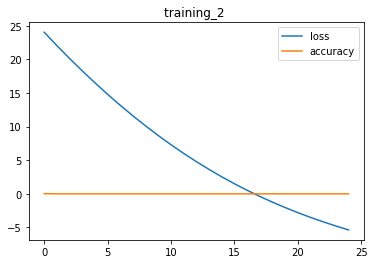

In [16]:
pd.DataFrame(history.history).plot()
plt.title("training_2 ")